#### This exercise aims to make you comfortable with the basic image processing tools and libraries. This exercise will serve as a starting point before you dive deep into the course.

### Let's first import basic image processing or related libraries.

In [4]:
import numpy as np                 # numpy library useful for most of the mathematical operations
import matplotlib.pyplot as plt    # useful for data visualization/plotting purpose. Can also be used for image visualization.

# For this exercise, we will restrict ourselves to matplotlib only. Please note that other libraries such as PIL, OpenCV
# can also be used as image processing libraries.

### First load an image and visualize it.

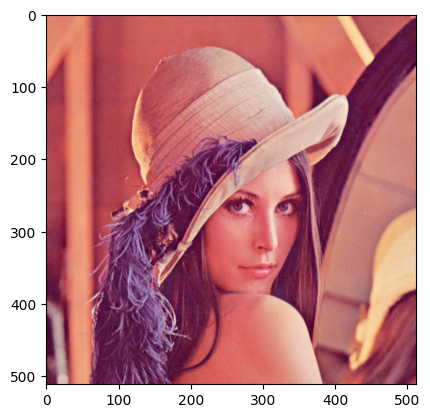

In [5]:
image = plt.imread("lena.png")
plt.imshow(image)

# 1. Image Information

#### It is always good to know basic image details, such as its dimensions, before one proceeds for the experiments.

#### Task1.1 : write code to find image dimension and print it

In [6]:
height, width = image.shape[:2]

print(f"Image Dimensions: {width} x {height} (Width x Height)")


Image Dimensions: 512 x 512 (Width x Height)


### Is this image RGB (no of channels?), gray or binary (intensity range?)? What can you say about aspect ratio (defined as width/height) of this image?

In [7]:
print("The image is of type RGB with 3 channels.")

# Calculate the intensity range
intensity_range = (image.min(), image.max())

# Calculate the aspect ratio
height, width = image.shape[:2]
aspect_ratio = width / height

print(f"Intensity Range: {intensity_range}")
print(f"Aspect Ratio: {aspect_ratio}")


The image is of type RGB with 3 channels.
Intensity Range: (np.float32(0.011764706), np.float32(1.0))
Aspect Ratio: 1.0


#### Task1.2:  Visualization of each channel

#### An RGB image can be decomposed into three channels, Red(R), Green(G), Blue(B). In this subsection, let's visualize each channel separately.

In [8]:

def VisualizeChannel(image, channel):
    '''
    This function is helpful to visualize a specific channel of an RGB image.
    image: RGB image
    channel: channel, one wish to visualize (can take value 0 (for red), 1 (green), 2 (blue))
    '''
    #write your code here
    output = image[:, :, channel]
    
    channel_name = ['Red', 'Green', 'Blue']
    plt.imshow(output, cmap='gray')
    plt.title(f"{channel_name[channel]} Channel")
    plt.axis('off')
    plt.show()
    
    return output  # 'output' is the image's particular channel values


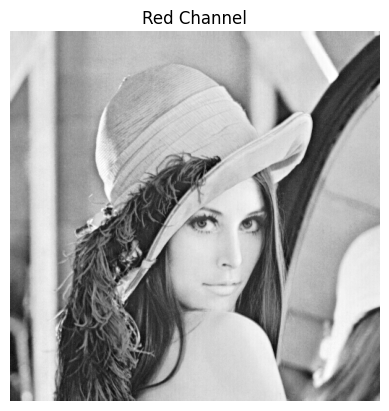

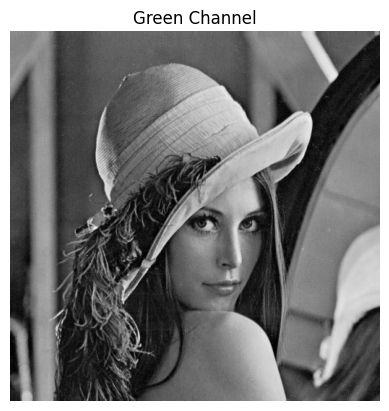

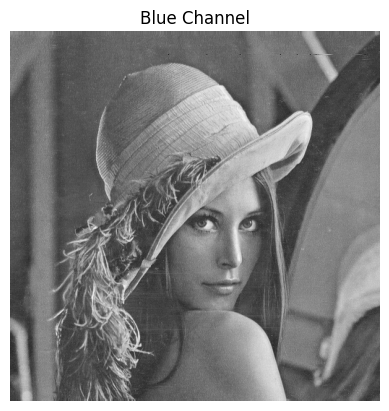

In [9]:

# Visualize the Red channel
red_channel = VisualizeChannel(image, 0)

# Visualize the Green channel
green_channel = VisualizeChannel(image, 1)

# Visualize the Blue channel
blue_channel = VisualizeChannel(image, 2)


#### Can you also comment on the maximum and minimum intensity values of each channel? What can you say about the range of intensity values?

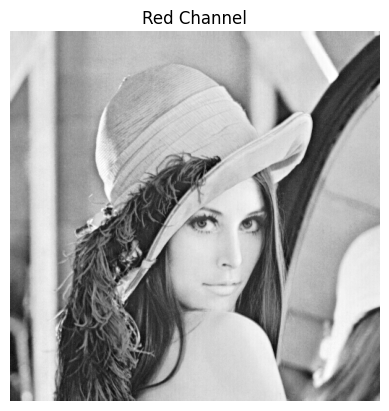

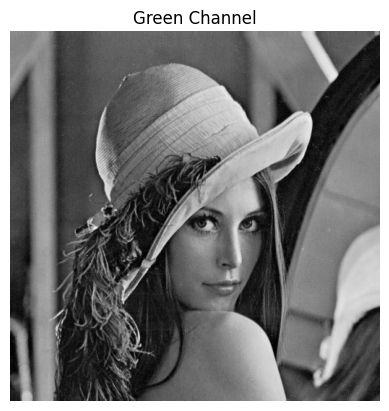

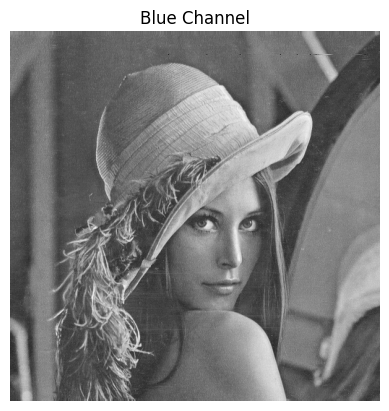

Red Channel: Max = 1.0, Min = 0.21176470816135406
Green Channel: Max = 0.9725490212440491, Min = 0.0117647061124444
Blue Channel: Max = 0.8823529481887817, Min = 0.0313725508749485


In [10]:
def VisualizeChannelWithStats(image, channel):
    '''
    This function visualizes a specific channel of an RGB image and calculates its intensity stats.
    image: RGB image
    channel: channel, one wish to visualize (can take value 0 (for red), 1 (green), 2 (blue))
    '''
    # Extract the specific channel
    channel_data = image[:, :, channel]
    max_intensity = channel_data.max()
    min_intensity = channel_data.min()
    
    # Plot the channel
    channel_name = ['Red', 'Green', 'Blue']
    plt.imshow(channel_data, cmap='gray')
    plt.title(f"{channel_name[channel]} Channel")
    plt.axis('off')
    plt.show()
    
    return max_intensity, min_intensity


# Visualize each channel and compute intensity stats
red_max, red_min = VisualizeChannelWithStats(image, 0)
green_max, green_min = VisualizeChannelWithStats(image, 1)
blue_max, blue_min = VisualizeChannelWithStats(image, 2)

# Print the intensity range for each channel
print(f"Red Channel: Max = {red_max}, Min = {red_min}")
print(f"Green Channel: Max = {green_max}, Min = {green_min}")
print(f"Blue Channel: Max = {blue_max}, Min = {blue_min}")


# 2. Intensity Manipulations

#### Task2.1: RGB to Gray  

#### We may need a gray image for some of our applications. One can also convert RGB to gray to reduce computational complexity. For this part, we will convert an RGB image to grayscale. Refer this link for explanation:  https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm

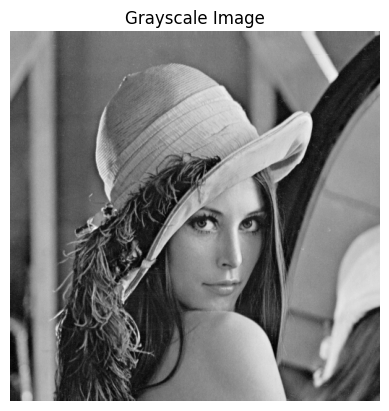

In [11]:

def RGB2Gray(image):
    '''
    This function converts an RGB image to grayscale
    image: RGB image
    '''
    #write you code here and visualize the result
    gray = 0.299 * image[:, :, 0] + 0.587 * image[:, :, 1] + 0.114 * image[:, :, 2]
    
    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')
    plt.show()
    
    return gray  # 'gray' is the grayscale image converted from RGB image


# Convert RGB to grayscale and visualize
gray_image = RGB2Gray(image)


We can also convert a gray image to a binary image. For task2.2, consider a gray image as input (you may take the output from task2.1 as input).

$$
I(x, y) = 
\begin{cases} 
1 & \text{if } I(x, y) \geq T \\
0 & \text{if } I(x, y) < T & \text{where T is threshold}
\end{cases}
$$

Though there are proper methods (such as the Otsu method) to find a suitable $T$, we will not go into details of those algorithms and randomly select T values and visualize the result.

#### Task2.2 : Gray to Binary

##### Before you proceed to code, Can you comment on the valid range of T? (Hint: Task1.2)

In [12]:
print("Valid Range of 𝑇:")

print(" The intensity range of a grayscale image is derived from the intensity range of the RGB image. Typically, the grayscale values are normalized between 0 (black) and 1 (white). Therefore, the valid range of T is:𝑇∈[0,1]. Any threshold T within this range can be used to binarize the image. A lower threshold will result in more pixels being classified as 1 (white), while a higher threshold will classify fewer pixels as 1.")

Valid Range of 𝑇:
 The intensity range of a grayscale image is derived from the intensity range of the RGB image. Typically, the grayscale values are normalized between 0 (black) and 1 (white). Therefore, the valid range of T is:𝑇∈[0,1]. Any threshold T within this range can be used to binarize the image. A lower threshold will result in more pixels being classified as 1 (white), while a higher threshold will classify fewer pixels as 1.


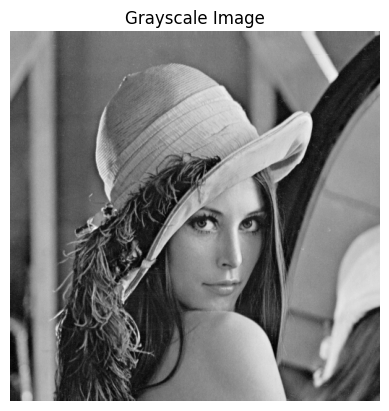

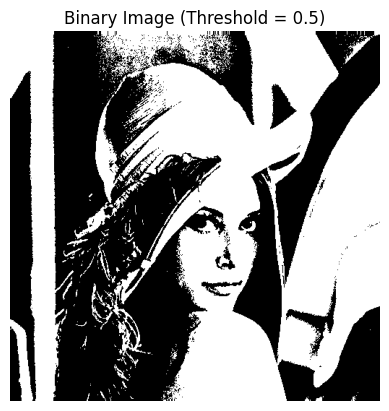

In [13]:
def Gray2Binary(image, T):
    '''
    This function converts a gray image to binary based on the rule stated above.
    image: Image (can be RGB or gray); if the image is RGB, it will be converted to gray first
    T: Threshold
    '''
    # Check if the input is an RGB image; if yes, convert it to grayscale
    if len(image.shape) == 3:
                # write code to convert it to gray or you can call function "RGB2Gray" defined in task2.1
        gray_image = RGB2Gray(image)  
    else:
        gray_image = image 

    #Write code to threshold image based on the rule stated above and return this binarized image (say it 'bimage')
    bimg = (gray_image >= T).astype(int)  

    #write code to visualize the resultant image
    plt.imshow(bimg, cmap='gray')
    plt.title(f"Binary Image (Threshold = {T})")
    plt.axis('off')
    plt.show()

    return bimg


binary_image = Gray2Binary(image, T=0.5)


An image is nothing but a matrix. Hence one can perform all kinds of mathematical operations on an image just like a matrix.

To convince ourselves with the above statement, let's crop a section of a gray image, print its value, and perform some mathematical operations. For a better data display, we will cut only 5*5 areas of the gray image.

####  Task2.3:  Crop a 5*5 section of a gray image

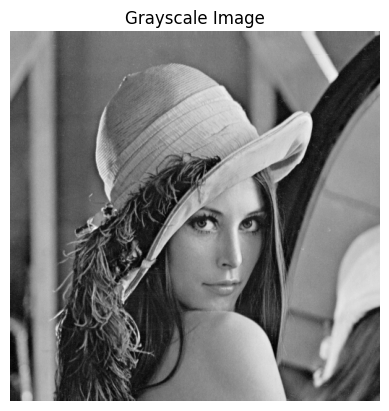

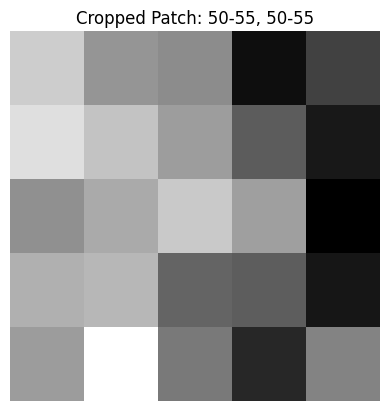

Patch Values:
[[0.6429255  0.6328667  0.6312471  0.6084706  0.6177373 ]
 [0.6462314  0.6412902  0.634251   0.62253726 0.6101922 ]
 [0.6320392  0.6366863  0.6423098  0.63470584 0.6058235 ]
 [0.6378157  0.63898826 0.62404704 0.6227726  0.60993725]
 [0.63417256 0.65210986 0.6279922  0.612949   0.6296039 ]]
[[0.6429255  0.6328667  0.6312471  0.6084706  0.6177373 ]
 [0.6462314  0.6412902  0.634251   0.62253726 0.6101922 ]
 [0.6320392  0.6366863  0.6423098  0.63470584 0.6058235 ]
 [0.6378157  0.63898826 0.62404704 0.6227726  0.60993725]
 [0.63417256 0.65210986 0.6279922  0.612949   0.6296039 ]]


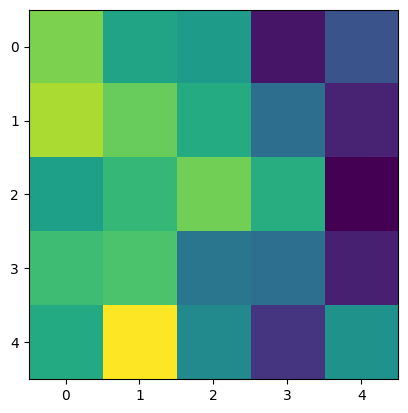

In [14]:
def ImageCrop(image, r0, c0):
    '''
    This function crops a 5x5 rectangular patch defined by image coordinates (r0, c0), (r0, c0+5), (r0+5, c0), and (r0+5, c0+5)
    of an image.
    image: Image can be RGB or gray
    r0: starting row index
    c0: starting column index
    '''
    # Check if the input is RGB; if yes, convert it to grayscale
    if len(image.shape) == 3:  # RGB image
        gray_image = RGB2Gray(image)  # Use the previously defined RGB2Gray function
    else:
        gray_image = image  # Already a grayscale image

    # Crop the 5x5 rectangular patch
    patch = gray_image[r0:r0+5, c0:c0+5]

    # Visualize the patch
    plt.imshow(patch, cmap='gray')
    plt.title(f"Cropped Patch: {r0}-{r0+5}, {c0}-{c0+5}")
    plt.axis('off')
    plt.show()

    # Print the patch values
    print("Patch Values:")
    print(patch)

    return patch

patch = ImageCrop(image, r0=50, c0=50)
print(patch)
plt.imshow(patch)

Now you have 5*5 patch and you know its values too. Can you try


1. multiplying patch by 0.5
2. multiplying patch by 2
3. create another random 5*5 patch (numpy array) and add/subtract it to the patch

Does it follow matrix addition/subtraction and multiplication rules? You can also play around with other matrix operations.

Original Patch:
 [[0.6429255  0.6328667  0.6312471  0.6084706  0.6177373 ]
 [0.6462314  0.6412902  0.634251   0.62253726 0.6101922 ]
 [0.6320392  0.6366863  0.6423098  0.63470584 0.6058235 ]
 [0.6378157  0.63898826 0.62404704 0.6227726  0.60993725]
 [0.63417256 0.65210986 0.6279922  0.612949   0.6296039 ]]
Patch multiplied by 0.5:
 [[0.32146275 0.31643334 0.31562355 0.3042353  0.30886865]
 [0.3231157  0.3206451  0.3171255  0.31126863 0.3050961 ]
 [0.3160196  0.31834316 0.3211549  0.31735292 0.30291176]
 [0.31890786 0.31949413 0.31202352 0.3113863  0.30496863]
 [0.31708628 0.32605493 0.3139961  0.3064745  0.31480196]]
Patch multiplied by 2:
 [[1.285851  1.2657334 1.2624942 1.2169412 1.2354746]
 [1.2924628 1.2825804 1.268502  1.2450745 1.2203844]
 [1.2640784 1.2733727 1.2846196 1.2694117 1.211647 ]
 [1.2756314 1.2779765 1.2480941 1.2455451 1.2198745]
 [1.2683451 1.3042197 1.2559844 1.225898  1.2592078]]
Random Patch:
 [[0.92869879 0.76222953 0.96860051 0.76562622 0.50128312]
 [0.34974149

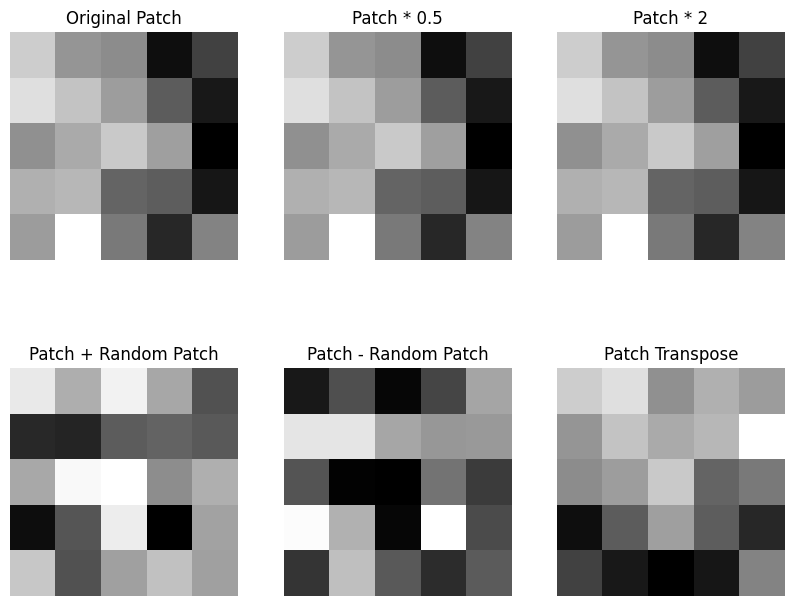

In [15]:
import numpy as np
import matplotlib.pyplot as plt


# 1. Multiply the patch by 0.5
patch_mult_05 = patch * 0.5

# 2. Multiply the patch by 2
patch_mult_2 = patch * 2

# 3. Create another random 5x5 patch
random_patch = np.random.random((5, 5))

# 4. Add and subtract the random patch
patch_add = patch + random_patch
patch_sub = patch - random_patch

# 5. Try other operations (Transpose and Dot Product)
patch_transpose = patch.T
patch_dot = np.dot(patch, patch_transpose)

# Visualize the results
print("Original Patch:\n", patch)
print("Patch multiplied by 0.5:\n", patch_mult_05)
print("Patch multiplied by 2:\n", patch_mult_2)
print("Random Patch:\n", random_patch)
print("Patch added with Random Patch:\n", patch_add)
print("Patch subtracted with Random Patch:\n", patch_sub)
print("Patch Transpose:\n", patch_transpose)
print("Dot Product of Patch and its Transpose:\n", patch_dot)

# Plot the patches
plt.figure(figsize=(10, 8))
plt.subplot(2, 3, 1)
plt.imshow(patch, cmap='gray')
plt.title("Original Patch")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(patch_mult_05, cmap='gray')
plt.title("Patch * 0.5")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(patch_mult_2, cmap='gray')
plt.title("Patch * 2")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(patch_add, cmap='gray')
plt.title("Patch + Random Patch")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(patch_sub, cmap='gray')
plt.title("Patch - Random Patch")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(patch_transpose, cmap='gray')
plt.title("Patch Transpose")
plt.axis('off')

plt.show()


#### Task2.4: Uniform Brightness Scaling

Hopefully, you are convinced that an image is a matrix. 

Hence we can perform multiplication/division or addition/subtraction operations.

These operations will change the brightness value of the image; can make an image brighter or darker depending on the multiplying/scaling factor. 

For this task, let's change the image brightness uniformly. Consider scale to be 0.3,0.5,1,2 for four different cases. What is your observation?

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def UniformBrightScaling(image, scale):
    '''
    This function uniformly increases or decreases the pixel values (of all image locations) by a factor 'scale'.
    image: image (can be RGB or gray image)
    scale: A scalar by which pixel values need to be multiplied
    '''
    if len(image.shape) == 3:  
        output = np.clip(image * scale, 0, 255)  
    else:
        output = np.clip(image * scale, 0, 255)  
    
    # Display the resultant image
    plt.imshow(output, cmap='gray' if len(image.shape) == 2 else None)
    plt.title(f"Scaled Image (Scale: {scale})")
    plt.axis('off')
    plt.show()
    
    return output


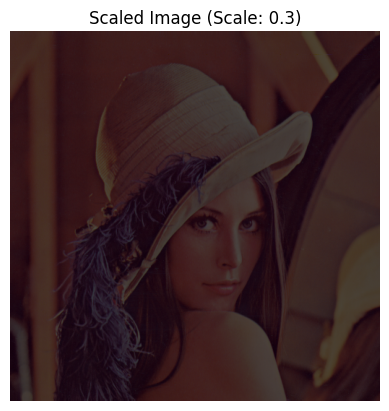

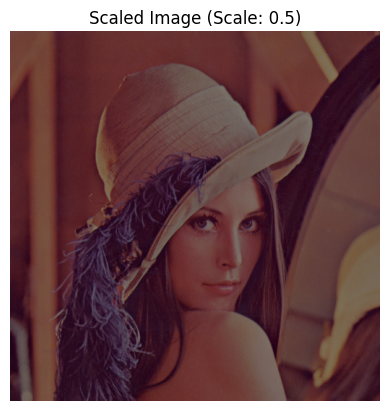

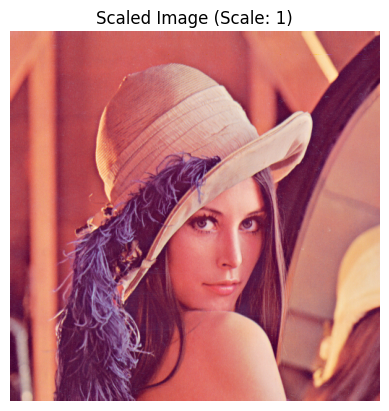

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.023529412..2.0].


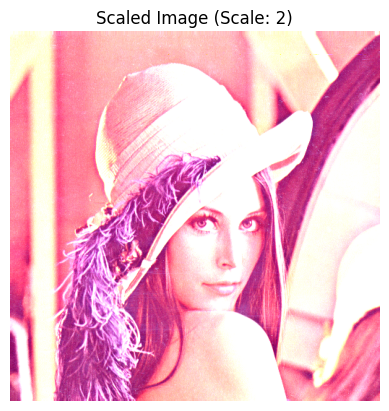

In [17]:

output1 = UniformBrightScaling(image, 0.3) 
output2 = UniformBrightScaling(image, 0.5) 
output3 = UniformBrightScaling(image, 1)   
output4 = UniformBrightScaling(image, 2)   


# 3. Image Filtering

In this section, you will perform some of the image filtering techniques.

Convolution is one of the most widely used operations for images. 

Convolution can be used as a feature extractor; different kernel results in various types of features.


Refer https://en.wikipedia.org/wiki/Kernel_(image_processing) to see few examples of kernel.


In [18]:
import numpy as np
import matplotlib.pyplot as plt

def feature_extractor(image, kernel):
    '''
    This function performs convolution operation to a gray image using a 3x3 kernel.
    image: image (can be RGB or gray); if RGB convert it to gray
    kernel: 3x3 convolution kernel
    '''
    if len(image.shape) == 3:  # RGB image
        gray_image = 0.2989 * image[:, :, 0] + 0.5870 * image[:, :, 1] + 0.1140 * image[:, :, 2]
    else:
        gray_image = image  # Already grayscale
    
    r, c = gray_image.shape
    
    output = np.zeros((r, c))
    
    pad_img = np.pad(gray_image, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    
    for row in range(1, r + 1):  # range(1, r+1) because we padded the image
        for col in range(1, c + 1):  # range(1, c+1) because we padded the image
            patch = pad_img[row-1:row+2, col-1:col+2]
            
            output[row-1, col-1] = np.sum(patch * kernel)  # You can also use np.dot(patch.flatten(), kernel.flatten())
    
    # Display the resulting image
    plt.imshow(output, cmap='gray')
    plt.title("Convolved Image")
    plt.axis('off')
    plt.show()

    return output


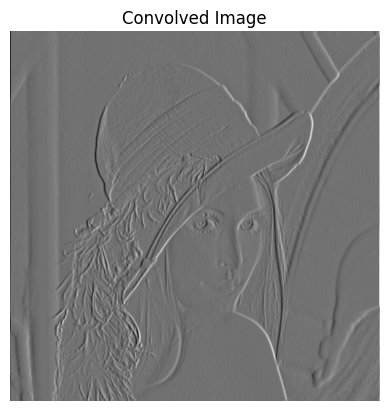

In [20]:
sobel_kernel = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])

output_image = feature_extractor(image, sobel_kernel)


## Note that the steps described above are to help you get started. You can follow other valid steps too. 
Result from all of the method should be the same. Pseudocode is available at: https://en.wikipedia.org/wiki/Kernel_(image_processing)

for the above case, consider all 3 * 3 kernels from https://en.wikipedia.org/wiki/Kernel_(image_processing). 

What was your observation with different kernels? 

You can also play with other kernels, take any 3*3 matrix of your choice, convolve it with a gray image and see if it extracts some image features. 

(You should be able to correlate your learning from this experiment during CNN lectures)

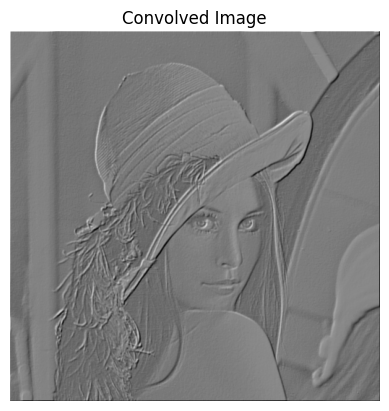

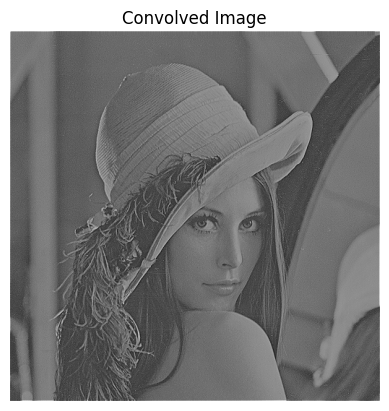

In [21]:
# Define custom kernel (e.g., Embossing Kernel)
emboss_kernel = np.array([[-2, -1,  0],
                          [-1,  1,  1],
                          [ 0,  1,  2]])

# Apply the custom kernel to your image
output_emboss = feature_extractor(image, emboss_kernel)

# Define another custom kernel (e.g., Edge Enhancement)
edge_enhance_kernel = np.array([[ 0, -1,  0],
                                [-1,  5, -1],
                                [ 0, -1,  0]])

# Apply Edge Enhancement kernel to the image
output_edge_enhance = feature_extractor(image, edge_enhance_kernel)


 Observations
* Edge Detection Kernels (e.g., Sobel) highlight edges, providing a way to extract outlines of objects in the image.
* Gaussian Blur reduces image noise and smoothens the image.
* Sharpening Kernels make edges stand out, enhancing image features.
* Custom Kernels like embossing or edge enhancement can highlight specific image features such as raised surfaces or sharp transitions.

# 4.Geometric Transformation

In all of the above cases, you performed operations on the pixel value, i.e., photometric transformations. Now for this section, you will apply the transformations on pixel locations, i.e., spatial transformations
It is advised to go through below mentioned references(in order) before proceeding to this section:
1. https://www.youtube.com/watch?v=7liGDs9Vf-I&list=PLfZZTc8qI7He2d0VIE5CjkCkrNIPJuOdW&index=6
2. https://www.youtube.com/watch?v=FleSNIZp2kc&list=PLfZZTc8qI7He2d0VIE5CjkCkrNIPJuOdW&index=8
3. https://www.youtube.com/watch?v=NYkMk17J9O0&list=PLfZZTc8qI7He2d0VIE5CjkCkrNIPJuOdW&index=9
4. https://www.youtube.com/playlist?list=PLfZZTc8qI7Hc7n4Y2xZcfPbsd5K6eMhPE (L09-L13)

#### Task4.1: Image Rotation (In-plane)

Write a function which rotates an image by 10 degrees in anticlockwise direction. (You can use inbuit functions for this, however it is encouraged to write code from scratch)

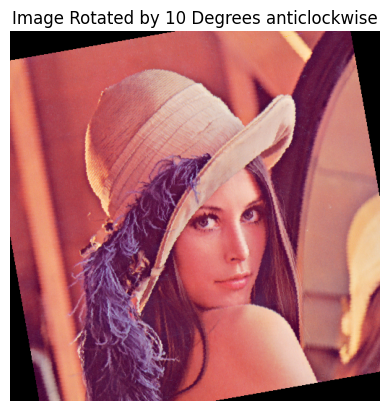

In [25]:
import math
def rotate_image(image, angle_degrees):
    """
    Rotate an image by a specified angle in the anticlockwise direction.

    image: input image (grayscale or RGB)
    angle_degrees: angle to rotate the image, in degrees (anticlockwise)
    
    Returns: rotated image
    """
    angle_radians = math.radians(angle_degrees)    
    r, c = image.shape[:2]
    center_x, center_y = c // 2, r // 2
    rotated_image = np.zeros_like(image)
    
    rotation_matrix = np.array([[math.cos(angle_radians), -math.sin(angle_radians)],
                                [math.sin(angle_radians), math.cos(angle_radians)]])
    for i in range(r):
        for j in range(c):
            original_x = (j - center_x)
            original_y = (i - center_y)
            
            new_coords = np.dot(rotation_matrix, np.array([original_x, original_y]))
            new_x = int(new_coords[0] + center_x)
            new_y = int(new_coords[1] + center_y)
            
            if 0 <= new_x < c and 0 <= new_y < r:
                rotated_image[i, j] = image[new_y, new_x]
    

    plt.imshow(rotated_image, cmap='gray' if len(rotated_image.shape) == 2 else None)
    plt.title(f"Image Rotated by {angle_degrees} Degrees anticlockwise")
    plt.axis('off')
    plt.show()

    return rotated_image

rotated_image = rotate_image(image, 10) 
